In [57]:
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [59]:
#print(x_train.shape)
#print(x_test.shape)

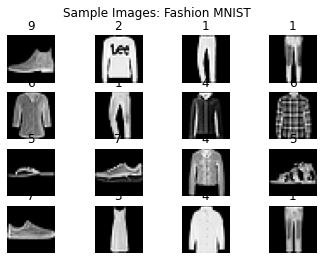

In [60]:
# plotting the data
for i in range(16):
  plt.suptitle("Sample Images: Fashion MNIST")
  ax =plt.subplot(4,4,i+1)
  img = x_test[i]
  ax.set_title(y_test[i])
  ax.axis('off')
  plt.imshow(img,cmap='gray')


In [61]:
def data_preprocessing(features):
  '''
  features: N * w * h array   (images)
  this function normalizes the intensity values
  '''
  data = features.astype(np.float)        #convert to float
  data_norm = data/255.0                 # normalized to 0 and 1
  return data_norm

In [62]:
def random__parameter_initialization(ip,layers,neurons):
  '''
  ip: number of input features 
  hlayer: no. of hidden layer (output layer included)
  neurons: list of neurons in different hidden layers
  This function returns weights (matrix) and bias (vector) of each layers
  '''
  if len(neurons) != layers:
    raise ValueError("the list size of neuron should be equal to layers values")
  s = neurons[0]*ip + neurons[0]          #parameters initialization --weigths and baises
  for i in range(len(neurons)-1):
    s = s + neurons[i]*neurons[i+1] + neurons[i+1]
  var = []
  for i in range(s):
    var.append(random())                  # generate parameters (Weights and biases)
  var = np.asarray(var)     #return weight matrix and bias vector for each layers
  W = {}
  B = {}
  neurons = np.asarray(neurons)
  neurons = np.hstack((ip,neurons)) 
  m = 0
  for j in range(layers): 
    W['w' + str(j)] = (var[m:m+neurons[j]*neurons[j+1]]).reshape(neurons[j+1],neurons[j])
    B['b' + str(j)] = var[m+neurons[j]*neurons[j+1]:m+neurons[j]*neurons[j+1]+neurons[j+1]]
    m = m+neurons[j]*neurons[j+1]+neurons[j+1]
  return W,B

In [69]:
def feedforward(data,W,B,activation):
  '''
  data: 2D data
  hidden: no. of hidden layers
  neurons: no. of neurons in each hidden layers --- list
  '''
  if len(W) != len(B):
    raise ValueError("Weight matrix for each layer should be of same lenght as that of bias vector")

  layers = len(W)

  if activation == 'sigmoid':
    for i in range(layers-1):         #exclude output layers (softmax to be used)
      #wt = (W['w'+str(i)])
      p = np.dot(W['w'+str(i)],data) + (B['b'+str(i)]).reshape(-1,1)     #pre activation
      out = sigmoid(p)        #activation
      data  = out
  elif activation == 'ReLU':
    for i in range(layers-1):
      p = np.dot(W['w'+str(i)],data) + (B['b'+str(i)]).reshape(-1,1)
      out = ReLU(p)
      data = out
  elif activation == 'tanh':
    for i in range(layers-1):
      p = np.dot(W['w'+str(i)],data) + (B['b'+str(i)]).reshape(-1,1)
      out = tanh(p)
      data = out

  output = np.dot(W['w'+str(layers-1)],data) + (B['b'+str(layers-1)]).reshape(-1,1)        #output layer pre activation
  output =  softmax(output)
  return output


In [70]:
def softmax(x):
  '''
  x: m*1 vector
  '''

  expo = np.exp(x)
  s = sum(expo)

  return expo/s

In [71]:
def sigmoid(x):
  '''
  x: m*1 vector
  returns sigmoid of x --- pointwise operation  (m*1)
  '''
  return 1/(1+np.exp(-1*x))

In [72]:
def diff_sigmoid(x):
  '''
  this function implements the derivative of sigmoid.
  x: m*1 array
  '''
  y = sigmoid(x)
  return y * (1-y)

In [74]:
data = np.array([1,2,3,4]).reshape(-1,1)
W,B = random__parameter_initialization(data.shape[0],3,[4,5,10])
activation = 'sigmoid'
feedforward(data,W,B,activation)

array([[0.20924675],
       [0.06111592],
       [0.12432442],
       [0.07902026],
       [0.03151131],
       [0.153391  ],
       [0.11325015],
       [0.06872631],
       [0.11436613],
       [0.04504774]])